In [38]:
from sklearn.datasets import load_iris
import numpy as np
iris_data = load_iris()

# We select feature 0 and 1
feat_1 = 0
feat_2 = 3
X = np.array([iris_data.data[:,feat_1], iris_data.data[:,feat_2]])
X = X.T
y = iris_data.target



In [39]:
from sklearn.model_selection import train_test_split

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (105, 2), X_test: (45, 2), y_train: (105,), y_test: (45,)


/tmp/ipykernel_97947/2484622574.py:5: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(x=np.concatenate([X_train[:,0], X_test[:,0]]),


<AxesSubplot: >

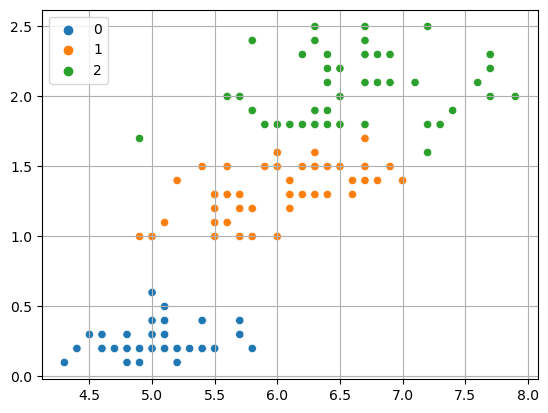

In [40]:
# Vizualize the data
import seaborn as sns
import matplotlib.pyplot as plt
plt.grid()
sns.scatterplot(x=np.concatenate([X_train[:,0], X_test[:,0]]), 
                y=np.concatenate([X_train[:,1], X_test[:,1]]),
                hue=np.concatenate([y_train, y_test]),
                palette=sns.color_palette("tab10"))

/tmp/ipykernel_97947/1293253800.py:3: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(x=(X_test[:,0]),


<AxesSubplot: >

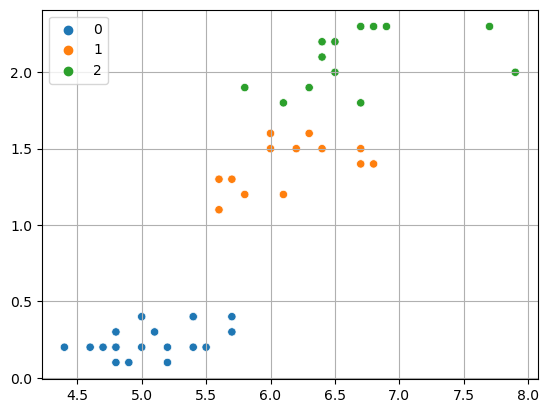

In [41]:
# Only visualize the test
plt.grid()
sns.scatterplot(x=(X_test[:,0]), 
                y=(X_test[:,1]),
                hue=(y_test),
                palette=sns.color_palette("tab10"))

In [65]:
from sklearn.cluster import KMeans
k = 3
k_means = KMeans(n_clusters=k, random_state=42)
# print(f"X_train.shape: {X_train.shape}")
k_means.fit(X_train)
y_pred = k_means.predict(X_test)
pred_accuaracy = (y_pred==y_test).astype("int").sum() / len(y_test) 
print(f"pred_accuaracy: {pred_accuaracy*100:.3}%")
cluster_centers = k_means.cluster_centers_
cluster_centers.shape

pred_accuaracy: 53.3%


(3, 2)

/tmp/ipykernel_97947/2862244741.py:3: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(x=np.concatenate([X_train[:,0], X_test[:,0]]),


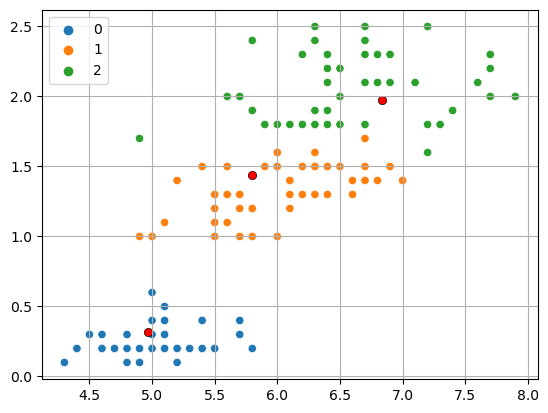

In [83]:
# Plot cluster centers
plt.grid()
sns.scatterplot(x=np.concatenate([X_train[:,0], X_test[:,0]]), 
                y=np.concatenate([X_train[:,1], X_test[:,1]]),
                hue=np.concatenate([y_train, y_test]),
                palette=sns.color_palette("tab10"))

sns.scatterplot(x=cluster_centers[:,0], 
                y=cluster_centers[:,1],
                edgecolor='k',
                color="r"
                )

plt.show()

In [44]:
# Testing the accuaracy of our knn
# ys = knn(X_train, X_test, y_train, y_test, k=3)
# accuaracy = sum(ys == y_test) / len(ys) 
# print(f"Accuaracy: {accuaracy * 100} %")